In [30]:

%load_ext autoreload
%autoreload 2

from pl_trainer import LightningModule
from data_module import MNISTDataModule
from torchvision import transforms
import torch.nn as nn
import lightning.pytorch as pl
import pandas as pd
import matplotlib.pyplot as plt
import torch

pl.seed_everything(42)

Seed set to 42


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


42

# Setting up Hyperparameters

In [31]:
#lr = 0.02 # Change learning rate here
lr = 1.0
batch_size = 64
max_epochs = 5

# Defining Model Architecture 

In [32]:
def create_model():
    """
        Initializes the model. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(),  # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        # Implement changes here
        nn.Linear(28 * 28, 64),  # First layer: input size (28*28) -> hidden layer with 64 nodes
        nn.ReLU(),  # Activation function for the hidden layer
        nn.Linear(64, 10)  # Output layer: from 64 nodes -> 10 classes (digits 0-9)
        # No need to include softmax, as this is already combined in the loss function
    )
    return model

# Initialize the model, data module, and trainer
pl_model = LightningModule(model = create_model(), lr=lr)

# Setting up Dataloaders and Transformations

In [33]:
my_transforms = transforms.Compose([
            transforms.ToTensor(),
            #Add normalization here 
            transforms.Normalize(mean=(0.5,), std=(0.5,))
        ])


mnist_data = MNISTDataModule(batch_size=batch_size, transforms=my_transforms)

# Train Model

In [34]:
# Initialize CSVLogger
csv_logger = pl.loggers.CSVLogger(save_dir='logs/', name='mnist_logs', version=0)

# Set up the trainer
trainer = pl.Trainer(max_epochs=max_epochs, logger=csv_logger, check_val_every_n_epoch=1, enable_checkpointing=False)

# Train the model
trainer.fit(pl_model, mnist_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Bex\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\fabric\loggers\csv_logs.py:268: Experiment logs directory logs/mnist_logs\version_0 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!

  | Name    | Type               | Params | Mode 
-------------------------------------------------------
0 | model   | Sequential         | 50.9 K | train
1 | loss_fn | CrossEntropyLoss   | 0      | train
2 | acc_fn  | MulticlassAccuracy | 0      | train
-------------------------------------------------------
50.9 K    Trainable params
0         Non-trainable params
50.9 K    Total params
0.204     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Bex\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\Bex\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


# Plot Results

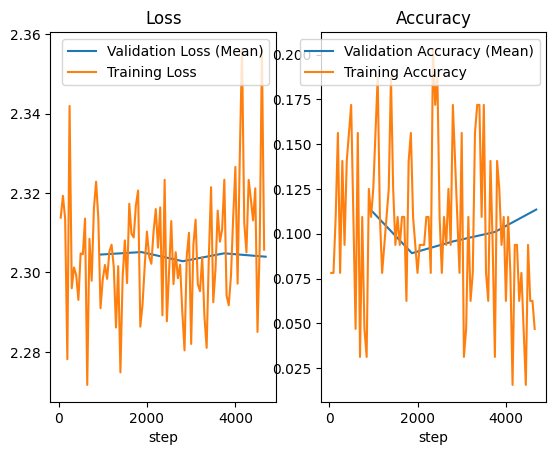

Final validation loss 2.304
Final validation accuracy 0.1135


In [35]:
df = pd.read_csv('logs/mnist_logs/version_0/metrics.csv')

# Create a figure and axes objects
fig, ax = plt.subplots(1,2)

# Plot 'val_loss' on the axes
df.dropna(subset=['val_loss']).plot(x='step', y='val_loss', ax=ax[0], label='Validation Loss (Mean)')
# Plot 'train_loss' on the same axes
df.dropna(subset=['train_loss']).plot(x='step', y='train_loss', ax=ax[0], label='Training Loss')

# Plot 'val_loss' on the axes
df.dropna(subset=['val_acc']).plot(x='step', y='val_acc', ax=ax[1], label='Validation Accuracy (Mean)')
# Plot 'train_loss' on the same axes
df.dropna(subset=['train_acc']).plot(x='step', y='train_acc', ax=ax[1], label='Training Accuracy')

ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
plt.show()

print("Final validation loss", round(df['val_loss'].iloc[-1], 4))
print("Final validation accuracy", round(df['val_acc'].iloc[-1], 4))

# Plot weights

In [36]:
def plot_weights(weight):
    """
        Plots the weights of the model. Only works for models with a single linear layer.
        returns the shape of the reshaped weights as torch.Size
    """

    fig, axs = plt.subplots(1, 10, figsize=(20, 2))
    
    reshaped_weight = weight.reshape(10, 28, 28) # TODO - Reshape the weight into the correct shape for MNIST
    
    
    for i in range(10):
        axs[i].imshow(reshaped_weight[i], cmap='viridis')
        axs[i].axis('off')
        
    return reshaped_weight.shape


weight = list(pl_model.model.children())[-1].state_dict()["weight"].cpu().data
print("Shape of weights:", weight.shape)
if weight.shape == torch.Size([10, 784]):
    plot_weights(weight)
else:
    print("This function only works for models with a single linear layer.")


Shape of weights: torch.Size([10, 64])
This function only works for models with a single linear layer.
